<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statsmodels.api import add_constant,Logit
import numpy as np
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,f1_score,roc_curve
from sklearn.metrics import roc_auc_score,log_loss,precision_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

#### Load the csv file

In [2]:
h=pd.read_csv('Heart_disease.csv')
h.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

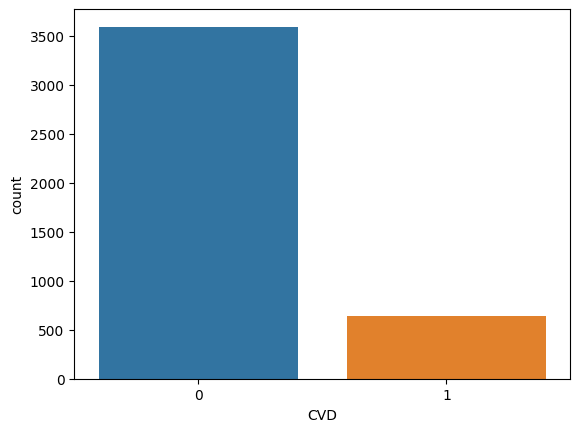

In [5]:
sns.countplot(x=h.CVD)
plt.show()

# As we can observe from the count plot, class 1 in 'CVD' is not fairly represented as it has a count
# quite less than the count of the class 0 in the variable. Hence, the data is imbalanced.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
pd.DataFrame({'Number':h.isna().sum(),'Percentage':round(h.isna().sum()/len(h)*100,2)})

,Number,Percentage
male,0,0.00
age,0,0.00
education,105,2.48
currentSmoker,0,0.00
cigsPerDay,29,0.68
BPMeds,53,1.25
prevalentStroke,0,0.00
prevalentHyp,0,0.00
diabetes,0,0.00
totChol,50,1.18


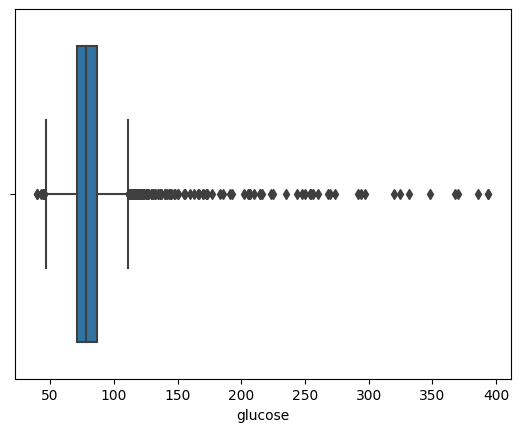

In [7]:
sns.boxplot(x=h.glucose)
plt.show()

In [8]:
h.glucose=h.glucose.fillna(h.glucose.median())
h=h[h.notna().all(axis=1)]
h.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [20]:
x=h[['diaBP','sysBP','BPMeds']]
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
l_bp=LogisticRegression().fit(xtrain,ytrain)
pd.DataFrame({'Predicted CVD':l_bp.predict(xtest)}).head()

,Predicted CVD
0,0
1,0
2,0
3,0
4,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
x=add_constant(h[['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp',
                  'diabetes']])
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
lc=Logit(ytrain,xtrain).fit()
lc.summary()

Optimization terminated successfully.
         Current function value: 0.400574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3183
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                 0.05157
Time:                        11:19:03   Log-Likelihood:                -1278.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 8.206e-27
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2701      0.141    -16.068      0.000      -2.547      -1.993
male                0.5446      0.105      5.183      0.000       0.339       0.751
education          -0.0975      0.051     -1.915      0.055      -0.197       0.002
currentSmoker       0.1751      0.106      1.659      0.097      -0.032       0.382
BPMeds              0.6828      0.230      2.966      0.003       0.232       1.134
prevalentStroke     0.6780      0.502      1.350      0.177      -0.307       1.663
prevalentHyp        0.8098      0.108      7.532      0.000       0.599       1.021
diabetes            0.8759      0.252      3.472      0.001       0.381       1.370
===================================================================================
"""

In [22]:
pd.DataFrame({'Predicted CVD':[0 if i<.5 else 1 for i in lc.predict(xtest)]}).head()

,Predicted CVD
0,0
1,0
2,0
3,0
4,0


In [23]:
pd.DataFrame({'Change in odds':np.exp(lc.params[1:])})

,Change in odds
male,1.723899
education,0.907138
currentSmoker,1.191338
BPMeds,1.979372
prevalentStroke,1.969881
prevalentHyp,2.247546
diabetes,2.400993


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
x=add_constant(h['prevalentHyp'])
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
lh=Logit(ytrain,xtrain).fit()
lh.summary()

Optimization terminated successfully.
         Current function value: 0.409951
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3189
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                 0.02937
Time:                        11:27:43   Log-Likelihood:                -1308.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 5.717e-19
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0800      0.068    -30.695      0.000      -2.213      -1.947
prevalentHyp     0.9083      0.101      8.987      0.000       0.710       1.106
================================================================================
"""

In [25]:
pd.DataFrame({'Predicted CVD':[0 if i<.5 else 1 for i in lh.predict(xtest)]}).head()

,Predicted CVD
0,0
1,0
2,0
3,0
4,0


In [26]:
print('Odds ratio =',np.exp(lh.params)[1]/(1/np.exp(lh.params)[1]))

Odds ratio = 6.150340773047484


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
lf=Logit(ytrain,xtrain).fit()
lf.summary()

Optimization terminated successfully.
         Current function value: 0.374956
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3175
Method:                           MLE   Df Model:                           15
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                  0.1122
Time:                        11:51:04   Log-Likelihood:                -1196.5
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 1.687e-55
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2215      0.774    -10.621      0.000      -9.739      -6.704
male                0.5295      0.117      4.520      0.000       0.300       0.759
age                 0.0643      0.007      8.885      0.000       0.050       0.079
education          -0.0040      0.052     -0.077      0.939      -0.107       0.099
currentSmoker       0.1109      0.167      0.666      0.506      -0.216       0.438
cigsPerDay          0.0191      0.007      2.854      0.004       0.006       0.032
BPMeds              0.3276      0.244      1.340      0.180      -0.152       0.807
prevalentStroke     0.7218      0.524      1.377      0.168      -0.306       1.749
prevalentHyp        0.1181      0.150      0.786      0.432      -0.176       0.413
diabetes            0.0047      0.358      0.013      0.989      -0.697       0.706
totChol             0.0022      0.001      1.781      0.075      -0.000       0.005
sysBP               0.0154      0.004      3.710      0.000       0.007       0.024
diaBP              -0.0018      0.007     -0.259      0.796      -0.016       0.012
BMI                -0.0042      0.014     -0.307      0.759      -0.031       0.023
heartRate          -0.0039      0.005     -0.856      0.392      -0.013       0.005
glucose             0.0067      0.002      2.768      0.006       0.002       0.011
===================================================================================
"""

In [30]:
print("McFadden's R2 =",lf.prsquared)

McFadden's R2 = 0.1122262467257189


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
lf.pvalues[lf.pvalues<.05][1:]

male          6.192205e-06
age           6.376674e-19
cigsPerDay    4.318018e-03
sysBP         2.073556e-04
glucose       5.635781e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
np.exp(lf.params[1:])

male               1.698069
age                1.066456
education          0.995961
currentSmoker      1.117320
cigsPerDay         1.019279
BPMeds             1.387665
prevalentStroke    2.058085
prevalentHyp       1.125361
diabetes           1.004725
totChol            1.002165
sysBP              1.015529
diaBP              0.998162
BMI                0.995784
heartRate          0.996113
glucose            1.006731
dtype: float64

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
p=[0 if i<.5 else 1 for i in lf.predict(xtest)]
confusion_matrix(ytest,p)

array([[678,   3],
       [111,   6]], dtype=int64)

In [42]:
print('Accuracy =',(678+6)/len(xtest))

Accuracy = 0.8571428571428571


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
p=[0 if i<.18 else 1 for i in lf.predict(xtest)]
cohen_kappa_score(ytest,p)

0.2561481441836816

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
x=h.drop('CVD',axis=1)
v=pd.Series(index=x.columns,dtype=float)
for i in range(x.shape[1]):
    v[i]=variance_inflation_factor(x,i)
print('Multicollinear features:')
v[v>5]

Multicollinear features:


age           40.938998
totChol       32.179476
sysBP        137.897625
diaBP        136.906815
BMI           45.135330
heartRate     38.244347
glucose       20.802548
dtype: float64

In [50]:
x=h.drop(['CVD','age','totChol','sysBP','diaBP','BMI','heartRate','glucose'],axis=1)
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(3191, 8) (798, 8) (3191,) (798,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
list(RFE(LogisticRegression(),n_features_to_select=5).fit(xtrain,ytrain).get_feature_names_out())

['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
x=add_constant(h[['male','BPMeds','prevalentStroke','prevalentHyp','diabetes']])
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
l5=Logit(ytrain,xtrain).fit()
l5.summary()

Optimization terminated successfully.
         Current function value: 0.401605
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3185
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                 0.04913
Time:                        13:02:16   Log-Likelihood:                -1281.5
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 7.268e-27
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3856      0.088    -27.017      0.000      -2.559      -2.213
male                0.5761      0.102      5.639      0.000       0.376       0.776
BPMeds              0.6681      0.230      2.907      0.004       0.218       1.119
prevalentStroke     0.6830      0.502      1.361      0.173      -0.300       1.666
prevalentHyp        0.8114      0.107      7.619      0.000       0.603       1.020
diabetes            0.8698      0.252      3.456      0.001       0.376       1.363
===================================================================================
"""

In [67]:
p=[0 if i<.5 else 1 for i in l5.predict(xtest)]
print('Accuracy =',accuracy_score(ytest,p),'\nF1 score =',f1_score(ytest,p))

Accuracy = 0.8533834586466166 
F1 score = 0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

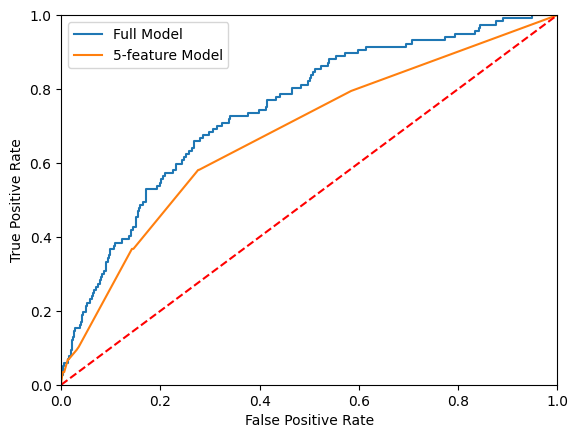

In [71]:
xf=add_constant(h.drop('CVD',axis=1))
x5=add_constant(h[['male','BPMeds','prevalentStroke','prevalentHyp','diabetes']])
y=h.CVD
xtrain,xtestf,ytrain,ytestf=train_test_split(xf,y,test_size=.2,random_state=1)
xtrain,xtest5,ytrain,ytest5=train_test_split(x5,y,test_size=.2,random_state=1)
ff,tf=roc_curve(ytestf,lf.predict(xtestf))[:2]
f5,t5=roc_curve(ytest5,l5.predict(xtest5))[:2]
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(ff,tf,label='Full Model')
plt.plot(f5,t5,label='5-feature Model')
plt.plot([0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
x=h['heartRate'].values.reshape(-1,1)
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
l_hr=LogisticRegression().fit(xtrain,ytrain)
p=l_hr.predict(xtest)
roc_auc_score(ytest,p)

0.5

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
x=h['heartRate'].values.reshape(-1,1)
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
p=l_hr.predict(xtest)
round(log_loss(ytest,p,normalize=False),2)

4217.11

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
x_hr=h['heartRate'].values.reshape(-1,1)
xf=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest_hr,ytrain,ytest_hr=train_test_split(x_hr,y,test_size=.2,random_state=1)
xtrain,xtestf,ytrain,ytestf=train_test_split(xf,y,test_size=.2,random_state=1)
p_hr=l_hr.predict(xtest_hr)
pf=[0 if i<.5 else 1 for i in lf.predict(xtestf)]
print('Accuracy of heart-rate model =',accuracy_score(ytest_hr,p_hr))
print('Accuracy of full model =',accuracy_score(ytestf,pf))

Accuracy of heart-rate model = 0.8533834586466166
Accuracy of full model = 0.8571428571428571


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
p=[0 if i<.5 else 1 for i in lf.predict(xtest)]
round(log_loss(ytest,p,normalize=False),2)

4108.98

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
x=add_constant(h[['currentSmoker','cigsPerDay']])
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
ls=Logit(ytrain,xtrain).fit()
ls.summary()

Optimization terminated successfully.
         Current function value: 0.420406
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3188
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                0.004616
Time:                        13:42:00   Log-Likelihood:                -1341.5
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                  0.001987
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8230      0.072    -25.428      0.000      -1.963      -1.682
currentSmoker    -0.1922      0.157     -1.223      0.221      -0.500       0.116
cigsPerDay        0.0191      0.006      3.108      0.002       0.007       0.031
=================================================================================
"""

In [89]:
p=[0 if i<.25 else 1 for i in ls.predict(xtest)]
print('Precision =',precision_score(ytest,p),'\nRecall =',recall_score(ytest,p),'\nF1 score =',
      f1_score(ytest,p))

Precision = 0.25 
Recall = 0.008547008547008548 
F1 score = 0.01652892561983471


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
fpr,tpr,th=roc_curve(ytest,lf.predict(xtest))
yt=pd.DataFrame({'Threshold':th,'TPR-FPR':tpr-fpr})
yt.nlargest(1,'TPR-FPR').Threshold.iloc[0]

0.16964451029170274

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
x=add_constant(h.drop('CVD',axis=1))
y=h.CVD
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)
ct=pd.DataFrame(columns=['Probability','Total Cost'])
j=0
for i in range(10,100):
    c=i/100
    cm=confusion_matrix(ytest,[0 if i<c else 1 for i in lf.predict(xtest)])
    ct.loc[j]=[c,cm[1,0]*3+cm[0,1]*1.3]
    j+=1
ct.nsmallest(1,'Total Cost').Probability.iloc[0]

0.26